# SOC Economics Model Demo

In [29]:
# from matplotlib import pyplot as plt
import numpy as np
import os
#from SOCEconModel import *

model_file_path = os.getcwd() + '/model.py'
exec(open(model_file_path).read())
model = SOCEconModel(1000,3,.4,.2,do_rewire=False,fix_demand=True)

## Variable setup for storing income and demand

Now let's set up some variables to store the income and demand information from the model run that we are interest in analyzing, and runs the model. This is done outside the model.py file because we want to separate the core model functionality from the analysis of model results. We might run to instantiate multiple models with different parameters, run them all, and track income and demand separately for each one. 

We set up a list for income data, and one for demand data, and set the number of model steps. Each list entry will be a tally of income (or demand) for one model period or step. The for loop calls the model's step() function num_steps number of times, and after each step appends demand and income data to our lists:

In [33]:
income, demand, num_steps = [], [], 5001
for i in range(num_steps):
    #model.period_income = 0
    model.step()
    
    income.append(model.period_income)
    demand.append(model.period_demand)
        
income_long_avg = np.convolve(income, np.ones((int(num_steps/40),))/int(num_steps/40), mode='valid')
income_short_avg = np.convolve(income, np.ones((int(num_steps/200),))/int(num_steps/200), mode='valid')
demand_coverage = sum(income)/sum(demand)

For running the model outside a notebook, use model_run.py (which contains code similar to the above).

## Plotting the data

Now let's look at some plots of the income and demand data. We create a figure and some lines, add axis labels and set the y-axis limit to 0, and then display the plot. The if statement gives us two sets of lines, one for short runs (< 5000 steps) and one for longer runs - this is because for longer runs, the noise in income will look messy when plotted. Try changing

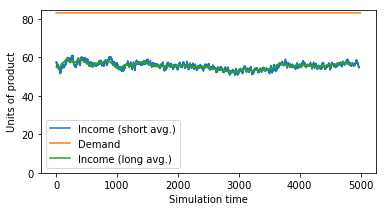

In [34]:
fig = plt.figure(1,figsize=(6,3))

if num_steps <= 5000:
    income_line, = plt.plot(income, label='Income')
    demand_line, = plt.plot(demand, label='Demand')
    income_avg_line, = plt.plot(income_long_avg, label='Income average')
    plt.legend([income_line, demand_line,income_avg_line], ['Income', 'Demand', 'Average Income'],loc='best')
else:
    income_short_line, = plt.plot(income_short_avg, label='Line 2')
    demand_line, = plt.plot(demand, label='Line 1')
    income_long_line, = plt.plot(income_long_avg, label='Line 1')
    plt.legend([income_short_line, demand_line,income_long_line], ['Income (short avg.)', 'Demand', 'Income (long avg.)'],loc='best')
    
plt.xlabel('Simulation time')
plt.ylabel('Units of product')
plt.ylim(bottom=0)
plt.show()